In [1]:
import torch
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter

from train_utils import prepare_cifar10_data, train_model, evaluate_model, show_reconstructed_images
from models import NFVAE, compute_loss_vae_flow

### Initial params
___

In [2]:
batch_size = 64
learning_rate = 1e-3
latent_dim = 128
flow_length = 2

num_epochs = 20
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

writer = SummaryWriter(log_dir=f'../runs/NF_VAE_medium_batch')

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])])

In [3]:
train_loader, val_loader, test_loader = prepare_cifar10_data(transform, batch_size)

nfvae_model = NFVAE(latent_dim=latent_dim, flow_length=flow_length).to(device)
optimizer = optim.Adam(nfvae_model.parameters(), lr=learning_rate)

trained_model = train_model(
    writer=writer,
    model=nfvae_model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    compute_loss=compute_loss_vae_flow,
    num_epochs=num_epochs,
    device=device
)

Epoch 1/20
train Loss: 2144.4550
val Loss: 1703.9610
Epoch 2/20
train Loss: 1661.3440
val Loss: 1603.3534
Epoch 3/20
train Loss: 1597.5548
val Loss: 1573.4427
Epoch 4/20
train Loss: 1575.7880
val Loss: 1576.0261
Epoch 5/20
train Loss: 1560.8944
val Loss: 1512.9066
Epoch 6/20
train Loss: 1562.3575
val Loss: 1524.5037
Epoch 7/20
train Loss: 1540.6710
val Loss: 1498.9034
Epoch 8/20
train Loss: 1526.4059
val Loss: 1485.6268
Epoch 9/20
train Loss: 1541.0379
val Loss: 1595.1941
Epoch 10/20
train Loss: 1530.0393
val Loss: 1507.4245
Epoch 11/20
train Loss: 1520.4895
val Loss: 1490.7820
Epoch 12/20
train Loss: 1509.9469
val Loss: 1484.6174
Epoch 13/20
train Loss: 1499.7066
val Loss: 1536.8826
Epoch 14/20
train Loss: 1583.4641
val Loss: 1504.2795
Epoch 15/20
train Loss: 1540.3647
val Loss: 1489.0208
Epoch 16/20
train Loss: 1522.0446
val Loss: 1480.8862
Epoch 17/20
train Loss: 1515.2330
val Loss: 1524.6719
Epoch 18/20
train Loss: 1553.1348
val Loss: 1615.4205
Epoch 19/20
train Loss: 1543.7370
val

In [4]:
test_loss = evaluate_model(
    writer=writer,
    model=trained_model,
    test_loader=test_loader,
    compute_loss=compute_loss_vae_flow,
    device=device
)

Test Loss: 1526.5068


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1770618..2.6952004].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290657..2.5976489].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.351526..2.6952004].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7692488..2.3440151].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2933714..1.908451].


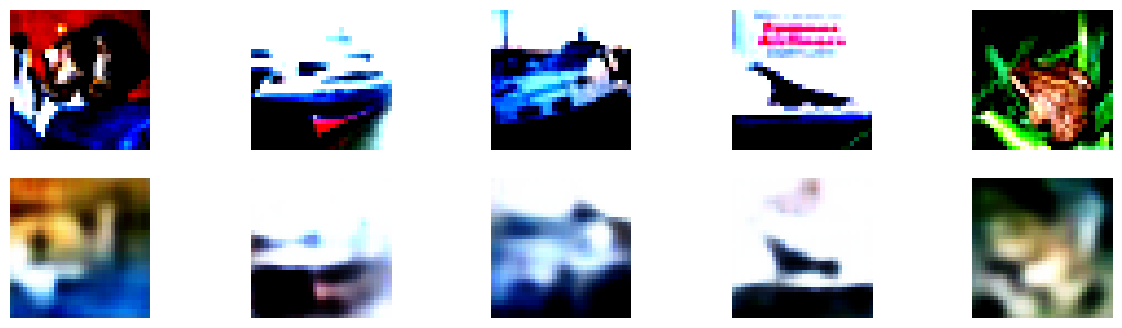

In [5]:
show_reconstructed_images(trained_model, test_loader, device, num_images=5)

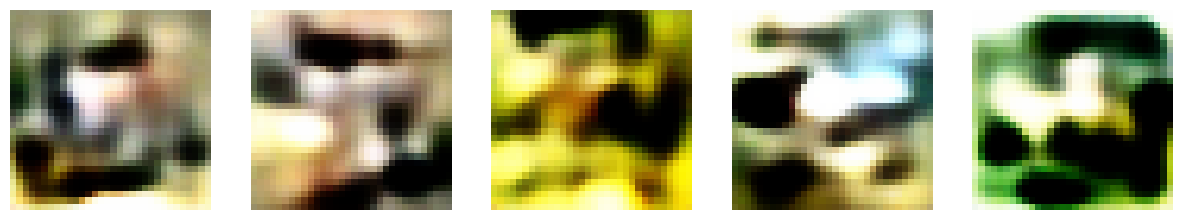

In [13]:
_ = trained_model.generate(device=device)

### Shorter Flow Length and Larger Latent Dimension
___

In [2]:
batch_size = 128
learning_rate = 5e-4
latent_dim = 256
flow_length = 1

num_epochs = 20
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

writer = SummaryWriter(log_dir=f'../runs/NF_VAE_big_batch')

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])])

In [3]:
train_loader, val_loader, test_loader = prepare_cifar10_data(transform, batch_size)

nfvae_model = NFVAE(latent_dim=latent_dim, flow_length=flow_length).to(device)
optimizer = optim.Adam(nfvae_model.parameters(), lr=learning_rate)

trained_model = train_model(
    writer=writer,
    model=nfvae_model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    compute_loss=compute_loss_vae_flow,
    num_epochs=num_epochs,
    device=device
)

Epoch 1/20
train Loss: 2686.1252
val Loss: 2009.6283
Epoch 2/20
train Loss: 1862.9235
val Loss: 1758.0620
Epoch 3/20
train Loss: 1717.1024
val Loss: 1664.2068
Epoch 4/20
train Loss: 1645.1112
val Loss: 1595.6350
Epoch 5/20
train Loss: 1587.6780
val Loss: 1553.1272
Epoch 6/20
train Loss: 1547.2244
val Loss: 1520.1936
Epoch 7/20
train Loss: 1515.3954
val Loss: 1492.1055
Epoch 8/20
train Loss: 1494.7287
val Loss: 1472.7248
Epoch 9/20
train Loss: 1475.3600
val Loss: 1457.0280
Epoch 10/20
train Loss: 1461.6490
val Loss: 1440.7898
Epoch 11/20
train Loss: 1446.9535
val Loss: 1432.0208
Epoch 12/20
train Loss: 1434.6381
val Loss: 1419.4570
Epoch 13/20
train Loss: 1424.6013
val Loss: 1408.2836
Epoch 14/20
train Loss: 1414.9837
val Loss: 1402.2885
Epoch 15/20
train Loss: 1407.6406
val Loss: 1396.1177
Epoch 16/20
train Loss: 1401.4817
val Loss: 1388.5803
Epoch 17/20
train Loss: 1395.6947
val Loss: 1385.3646
Epoch 18/20
train Loss: 1390.2647
val Loss: 1378.1311
Epoch 19/20
train Loss: 1386.0297
val

In [4]:
test_loss = evaluate_model(
    writer=writer,
    model=trained_model,
    test_loader=test_loader,
    compute_loss=compute_loss_vae_flow,
    device=device
)

Test Loss: 1377.3059


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1770618..2.6952004].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290657..2.5976489].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.351526..2.6952004].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7692488..2.3440151].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2933714..1.908451].


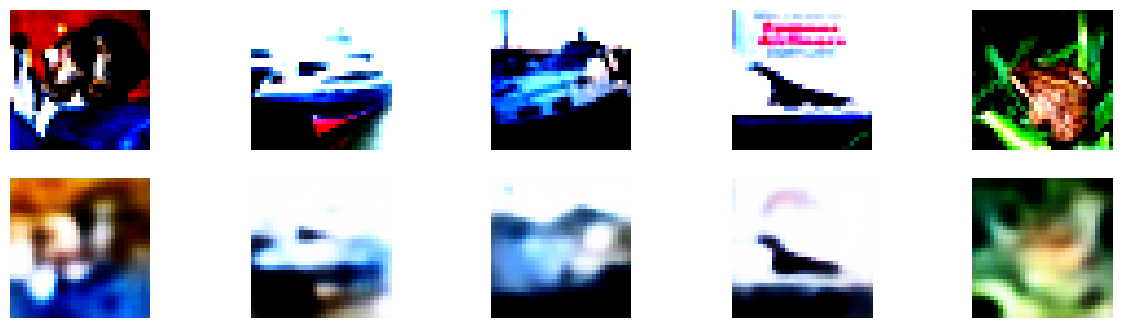

In [5]:
show_reconstructed_images(trained_model, test_loader, device, num_images=5)

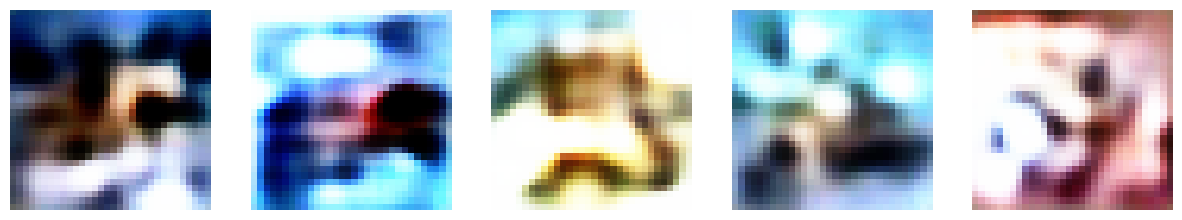

In [6]:
_ = trained_model.generate(device=device)

### Longer Flow Length and Reduced Latent Dimension
___

In [16]:
batch_size = 32
learning_rate = 2e-3
latent_dim = 64
flow_length = 4

num_epochs = 20
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

writer = SummaryWriter(log_dir=f'../runs/NF_VAE_small_batch')

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])])

In [17]:
train_loader, val_loader, test_loader = prepare_cifar10_data(transform, batch_size)

nfvae_model = NFVAE(latent_dim=latent_dim, flow_length=flow_length).to(device)
optimizer = optim.Adam(nfvae_model.parameters(), lr=learning_rate)

trained_model = train_model(
    writer=writer,
    model=nfvae_model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    compute_loss=compute_loss_vae_flow,
    num_epochs=num_epochs,
    device=device
)

Epoch 1/20
train Loss: 2062.5192
val Loss: 1712.5962
Epoch 2/20
train Loss: 1728.3515
val Loss: 1717.1995
Epoch 3/20
train Loss: 1691.5928
val Loss: 1614.0884
Epoch 4/20
train Loss: 1809.6208
val Loss: 1831.7454
Epoch 5/20
train Loss: 1834.1829
val Loss: 1720.4266
Epoch 6/20
train Loss: 1795.0229
val Loss: 1905.5618
Epoch 7/20
train Loss: 1839.7689
val Loss: 1676.0725
Epoch 8/20
train Loss: 1785.5211
val Loss: 1722.7988
Epoch 9/20
train Loss: 1892.8687
val Loss: 1938.5798
Epoch 10/20
train Loss: 1868.0813
val Loss: 1697.4382
Epoch 11/20
train Loss: 2147.0141
val Loss: 1873.9750
Epoch 12/20
train Loss: 1956.7979
val Loss: 1841.5061
Epoch 13/20
train Loss: 99932.1935
val Loss: 2468.1038
Epoch 14/20
train Loss: 2251.9000
val Loss: 2125.7061
Epoch 15/20
train Loss: 2160.5937
val Loss: 2151.4302
Epoch 16/20
train Loss: 2147.0921
val Loss: 2184.8316
Epoch 17/20
train Loss: 2084.7619
val Loss: 2101.6208
Epoch 18/20
train Loss: 2602.2263
val Loss: 2291.9644
Epoch 19/20
train Loss: 2181.1367
va

In [18]:
test_loss = evaluate_model(
    writer=writer,
    model=trained_model,
    test_loader=test_loader,
    compute_loss=compute_loss_vae_flow,
    device=device
)

Test Loss: 2343.1211


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1770618..2.6952004].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290657..2.5976489].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.351526..2.6952004].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7692488..2.3440151].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2933714..1.908451].


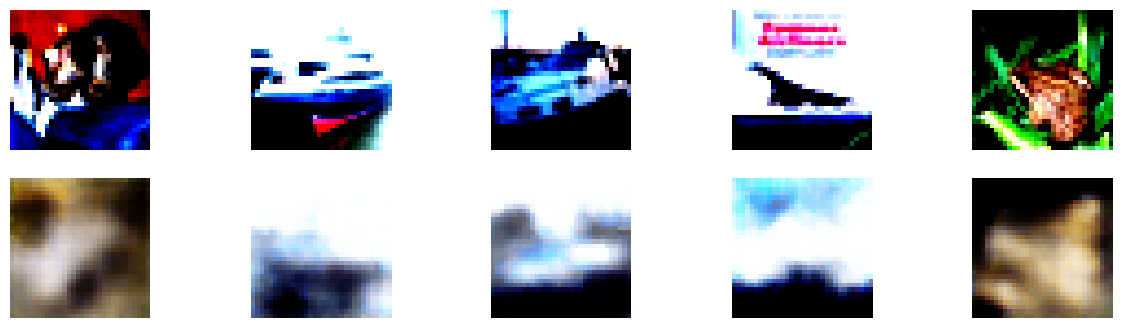

In [19]:
show_reconstructed_images(trained_model, test_loader, device, num_images=5)

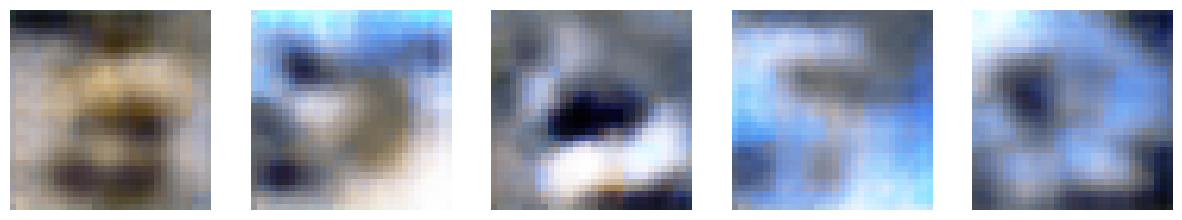

In [21]:
_ = trained_model.generate(device=device)